# Homework 5

In [1]:
#imports
from importlib import reload

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import ventilated_thermocline

In [2]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

In [12]:
def contour_plot(field, title=None, cmap='jet', nlevels=8, clabel=True, ax=None,
                x=None, y=None):
    cm = plt.get_cmap(cmap)
    if ax is None:
        fig = plt.figure(figsize=(10,10))
        ax = plt.gca()

    if x is not None:
        CS = ax.contour(x, y, field, levels=nlevels, cmap=cm)
    else:
        CS = ax.contour(field, levels=nlevels, cmap=cm)

    if clabel:
        ax.clabel(CS, inline=True, fontsize=12)
    #if title is not None:
    #    ax.set_title(title, fontsize=18.)

    #ax.set_aspect('equal', 'datalim')

# North Atlantic

In [ ]:
reload(ventilated_thermocline)
xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers()

> /home/xavier/Projects/Oceanography/os_classes/OCEA-201/hw/5/ventilated_thermocline.py(187)two_layers()
    185     # at (0,theta2)..
    186     #
--> 187     D02w=D0fact*np.sin(np.pi*f2/f0)
    188     Gamma12=gamma1/gamma2
    189     hw=np.sqrt(D02w+H2*H2)

ipdb> h1[10,10]
14.469536033527298
ipdb> c


/home/xavier/Projects/Oceanography/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  D02w=D0fact*np.sin(np.pi*f2/f0)


> /home/xavier/Projects/Oceanography/os_classes/OCEA-201/hw/5/ventilated_thermocline.py(224)two_layers()
    222     import pdb; pdb.set_trace()
    223 
--> 224     phi=np.arange(im)*dphi
    225     gdphi = phi < ps
    226     for j in np.where(gdf)[0]:

ipdb> h1[10,10]
nan


In [38]:
shadx

array([           -inf, -3.55716169e+04, -1.75427213e+04, -1.15356525e+04,
       -8.53399864e+03, -6.73447789e+03, -5.53599704e+03, -4.68094522e+03,
       -4.04051744e+03, -3.54315576e+03, -3.14592575e+03, -2.82150582e+03,
       -2.55168180e+03, -2.32384417e+03, -2.12898632e+03, -1.96050359e+03,
       -1.81344270e+03, -1.68401597e+03, -1.56927762e+03, -1.46690214e+03,
       -1.37502927e+03, -1.29215321e+03, -1.21704204e+03, -1.14867819e+03,
       -1.08621381e+03, -1.02893675e+03, -9.76244551e+02, -9.27624066e+02,
       -8.82635534e+02, -8.40899923e+02, -8.02088804e+02, -7.65916189e+02,
       -7.32131901e+02, -7.00516141e+02, -6.70875024e+02, -6.43036873e+02,
       -6.16849135e+02, -5.92175795e+02, -5.68895199e+02, -5.46898211e+02,
       -5.26086648e+02, -5.06371944e+02, -4.87674005e+02, -4.69920218e+02,
       -4.53044608e+02, -4.36987092e+02, -4.21692845e+02, -4.07111734e+02,
       -3.93197832e+02, -3.79908987e+02, -3.67206445e+02, -3.55054515e+02,
       -3.43420275e+02, -

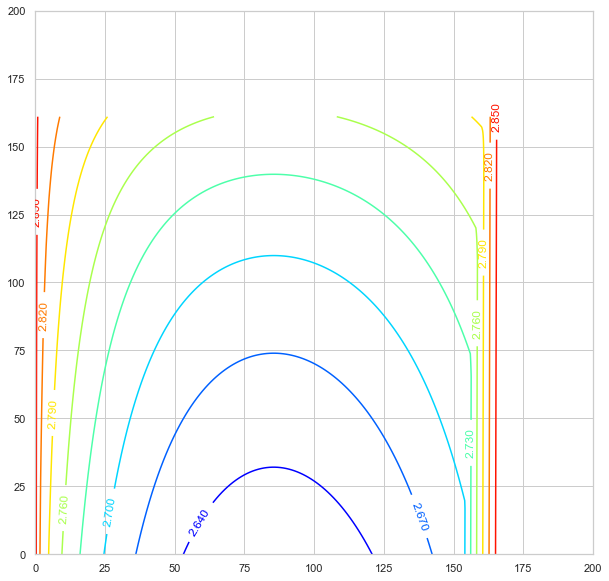

In [39]:
contour_plot(psi2)#, x=yarr, y=xarr)

In [48]:
np.sum(np.isfinite(psi1))

0

/home/xavier/miniconda3/lib/python3.8/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/xavier/miniconda3/lib/python3.8/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-12-e4d522cc3aa2>:11: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(field, levels=nlevels, cmap=cm)


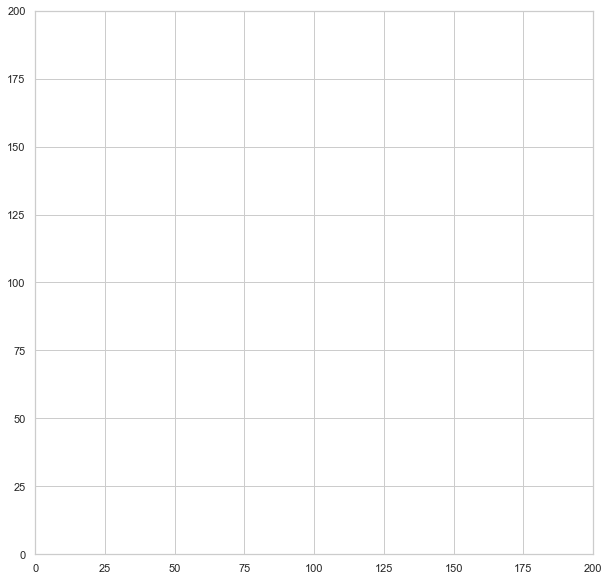

In [42]:
contour_plot(psi1)#, x=xarr, y=yarr)